Earliest date: 2023-01-01 00:00:00
Latest date: 2023-12-31 00:00:00
Unique days: 365


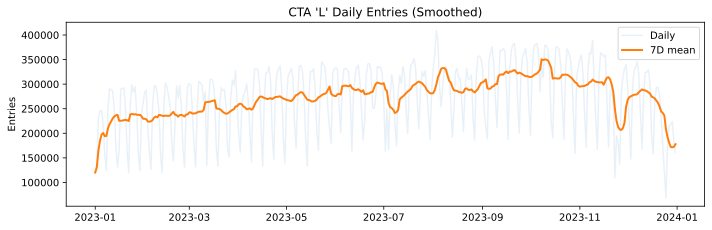

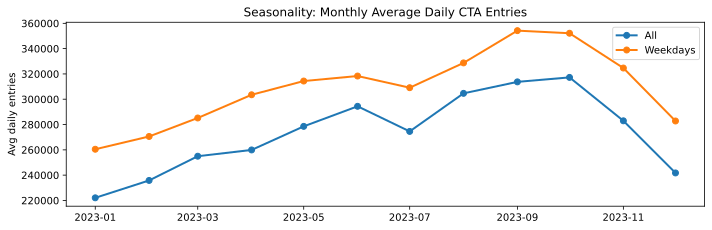

Summer (Jun-Aug) avg daily entries: 291,178
Winter (Dec-Feb) avg daily entries: 233,133
Summer/Winter ratio: 1.25


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CTA 'L' ridership (daily station entries) — 2023 seasonality check
# Optional GitHub: https://github.com/yourname/...

# Read CSV (keep only needed columns) and set dtypes
cols = ["station_id", "stationname", "date", "daytype", "rides"]
df = pd.read_csv("5neh-572f (3).csv", usecols=cols, parse_dates=["date"])
df["rides"] = pd.to_numeric(df["rides"], errors="coerce")
df["daytype"] = df["daytype"].astype("category")
df = df.dropna(subset=["rides"])

# Quick data coverage check
print("Earliest date:", df["date"].min())
print("Latest date:", df["date"].max())
print("Unique days:", df["date"].dt.date.nunique())

def daily_total(data: pd.DataFrame) -> pd.Series:
    """System-wide total entries per day across all stations."""
    return data.groupby("date")["rides"].sum().sort_index().asfreq("D")

# Build daily series (all + weekdays)
daily_all = daily_total(df)
daily_wd = daily_total(df[df["daytype"] == "W"])

# Smooth trend and monthly seasonality
roll7 = daily_all.rolling("7D", min_periods=1).mean()
monthly_all = daily_all.resample("MS").mean()
monthly_wd = daily_wd.resample("MS").mean()

# Plot 1: Daily + 7-day rolling mean
plt.figure(figsize=(10, 3.3), dpi=150)
plt.plot(daily_all.index, daily_all, alpha=0.10, label="Daily")
plt.plot(roll7.index, roll7, linewidth=2, label="7D mean")
plt.title("CTA 'L' Daily Entries (Smoothed)")
plt.ylabel("Entries")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Monthly average daily entries (seasonality)
plt.figure(figsize=(10, 3.3), dpi=150)
plt.plot(monthly_all.index, monthly_all, marker="o", linewidth=2, label="All")
plt.plot(monthly_wd.index, monthly_wd, marker="o", linewidth=2, label="Weekdays")
plt.title("Seasonality: Monthly Average Daily CTA Entries")
plt.ylabel("Avg daily entries")
plt.legend()
plt.tight_layout()
plt.show()

# Numeric summary: summer vs winter (daily-weighted)
summer = daily_all[daily_all.index.month.isin([6, 7, 8])].mean()
winter = daily_all[daily_all.index.month.isin([12, 1, 2])].mean()
ratio = summer / winter
print(f"Summer (Jun-Aug) avg daily entries: {summer:,.0f}")
print(f"Winter (Dec-Feb) avg daily entries: {winter:,.0f}")
print(f"Summer/Winter ratio: {ratio:.2f}")

# Interpretation: Ridership is higher in summer and lower in winter.
# Monthly averages and the 7-day mean show the same seasonal pattern.
# Weekdays reduce weekend/holiday noise; the ratio summarizes the gap.

